# **Wykrywanie phishingowych stron internetowych - Trenowanie i uczenie modeli**

*Notebook stworzony na potrzebę realizacji pracy magisterskiej pod kierunkiem dr hab. Marka Góździa.*

## **1. Cel:**
Celem tego projektu jest przeszkolenie kilku wybranych modeli uczenia maszynowego na utworzonym uprzednio zbiorze danych, aby następnie być w stanie klasyfikować witryny internetowe jako bezpieczne lub phishingowe. Zarówno te bezpieczne, jak i strony phishingowe zostały zebrane w celu stworzenia zbioru danych, na podstawie którego przeprowadzone zostanie uczenie maszynowe. Zmierzona oraz porównana zostanie skuteczność w tym zadaniu dla kilku wybranych modeli uczenia maszynowego.

## **2. Ładowanie danych:**

Utworzony uprzednio zbiór danych został wyodrębniony i zapisany do pliku csv. Proces zbierania tych danych można prześledzić w pliku „url_feature_extraction.ipynb”.

Powstały plik CSV został załadowany w ramce danych data0.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Loading the data
data0 = pd.read_csv('data/urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,dewatergroep.be,0,0,0,0,0,0,0,0,0,12,0,1,0,0,0,0
1,poppankki.fi,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0
2,ceskaposta.cz,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1,0
3,suncoastcreditunion.com,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0
4,caf.fr,0,0,0,0,0,0,0,0,0,26,0,0,0,0,0,0


## **3. Zapoznanie się z danymi**

Na tym etapie skorzystamy z różnych funkcji bibliotek Pandas oraz Numpy, aby zapoznać się ze strukturą i charakterystyką zgromadzonych danych.

In [3]:
#Checking the shape of the dataset
data0.shape

(11782, 17)

In [4]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click',
       'Web_Forwards', 'Label'],
      dtype='object')

In [5]:
#Information about the dataset
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11782 entries, 0 to 11781
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         11782 non-null  object
 1   Have_IP        11782 non-null  int64 
 2   Have_At        11782 non-null  int64 
 3   URL_Length     11782 non-null  int64 
 4   URL_Depth      11782 non-null  int64 
 5   Redirection    11782 non-null  int64 
 6   https_Domain   11782 non-null  int64 
 7   TinyURL        11782 non-null  int64 
 8   Prefix/Suffix  11782 non-null  int64 
 9   DNS_Record     11782 non-null  int64 
 10  Domain_Age     11782 non-null  int64 
 11  Domain_End     11782 non-null  int64 
 12  iFrame         11782 non-null  int64 
 13  Mouse_Over     11782 non-null  int64 
 14  Right_Click    11782 non-null  int64 
 15  Web_Forwards   11782 non-null  int64 
 16  Label          11782 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 1.5+ MB


Zbiór danych zawiera 17 kolumn, z których pierwsza to domena, kolejnych 15 to wyodrębnione cechy, a ostatnia to etykieta, która określa, czy dany adres URL jest prawdziwy (0) czy phishingowy (1). W zbiorze danych znajduje się 11782 wierszy.

## **4. Wizualizacja danych**
W tym etapie utworzono wykresy, które pozwalają sprawdzić rozkład danych i wzajemne powiązania funkcji.

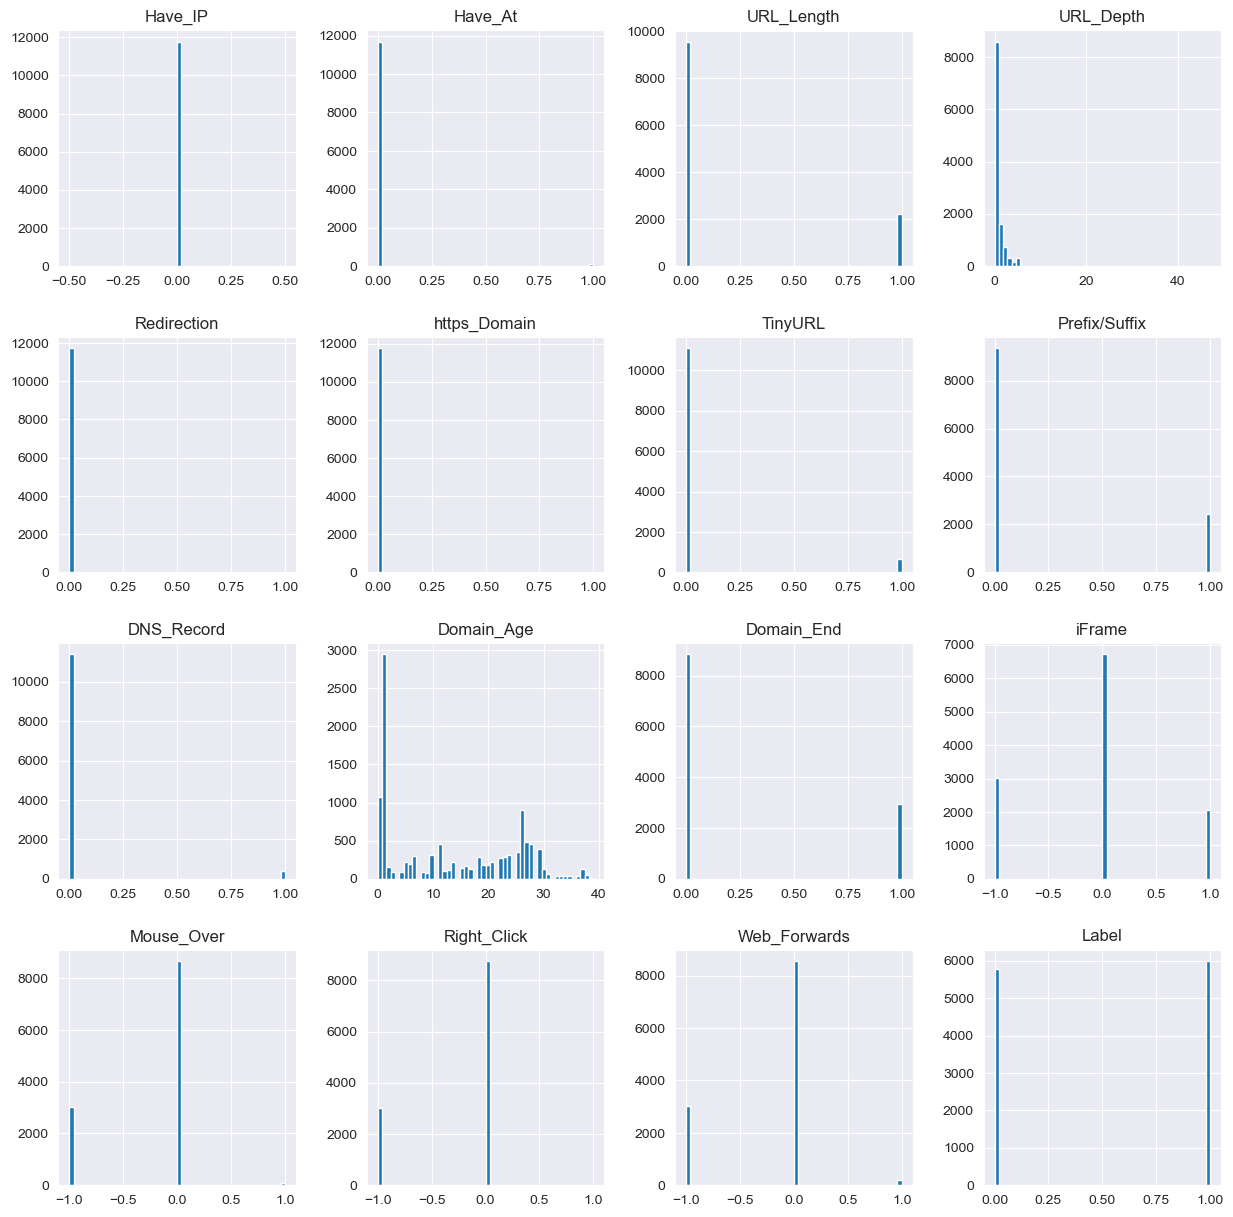

In [6]:
#Plotting the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

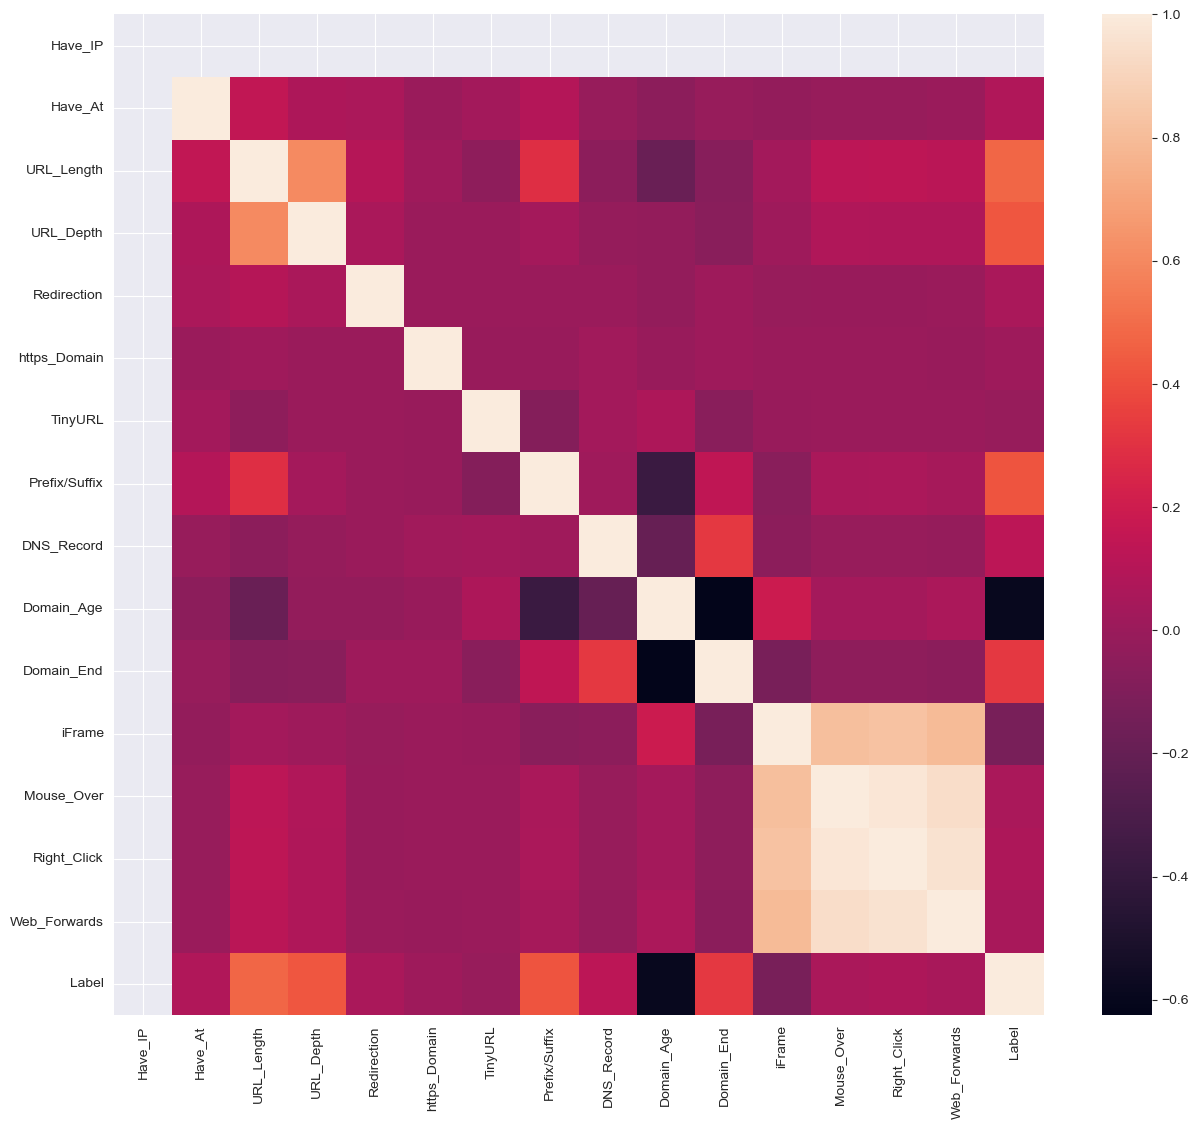

In [7]:
#Correlation heatmap
# Step 1: Identify non-numeric columns
non_numeric_columns = data0.select_dtypes(exclude=[np.number]).columns

# Step 2: Drop non-numeric columns
data_numeric = data0.drop(non_numeric_columns, axis=1)

# Now data_numeric contains only numeric data
# Step 4: Calculate correlation matrix for numeric data
plt.figure(figsize=(15,13))
sns.heatmap(data_numeric.corr())
plt.show()

Z powyższych wykresów oraz mapy korlacji wynika, że dane nie są skorelowane, co oznacza, że nie ma potrzeby usuwania żadnych funkcji. Wszystkie funkcje są niezależne od siebie.

## **5. Wstępne przetwarzanie danych**

Na tym etapie przetwarzamy dane, stosując techniki wstępnego przetwarzania i przekształcania danych, aby przygotować je do późniejszego wykorzystania w treningu.

In [8]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,11782.0,11782.000000,11782.000000,11782.000000,11782.000000,11782.000000,11782.000000,11782.000000,11782.000000,11782.000000,11782.000000,11782.000000,11782.000000,11782.000000,11782.000000,11782.000000
mean,0.0,0.006960,0.188678,0.565269,0.003565,0.000255,0.057206,0.205483,0.033356,13.263368,0.249618,-0.081056,-0.247072,-0.254795,-0.238669,0.509251
std,0.0,0.083138,0.391269,1.298740,0.059602,0.015956,0.232245,0.404071,0.179572,11.520923,0.432810,0.650921,0.450765,0.437708,0.464408,0.499936
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.0,1.000000,1.000000,47.000000,1.000000,1.000000,1.000000,1.000000,1.000000,39.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Powyższy wynik pokazuje, że większość danych składa się z zer, jedynek oraz minus jedynek, z wyjątkiem kolumn „Domena” i „Depth_URL”. Kolumna Domena nie ma żadnego znaczenia w procesie uczenia maszynowego, dlatego zostanie usunięta.

In [9]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [10]:
#checking the data for null or missing values
data.isnull().sum()

Have_IP          0
Have_At          0
URL_Length       0
URL_Depth        0
Redirection      0
https_Domain     0
TinyURL          0
Prefix/Suffix    0
DNS_Record       0
Domain_Age       0
Domain_End       0
iFrame           0
Mouse_Over       0
Right_Click      0
Web_Forwards     0
Label            0
dtype: int64

Nasz zbiór danych nie posiada żadnych wartości brakujących, co oznacza, że jest gotowy do przeprowadzenia procesu uczenia.

W pliku urldata.csv, wyodrębnione cechy stron prawdziwych i phishingowych są po prostu łączone bez jakiegokolwiek tasowania. Skutkuje to tym, że górne 5783 wierszy zawiera dane zebrane z prawdziwych adresów URL, a dolne 5999 wierszy z adresów phishingowych.

Aby wyrównać rozkład danych podczas dzielenia na zbiory treningowe i testowe, musimy je potasować. Taki zabieg pomaga również uniknąć nadmiernego dopasowania (overfitting) podczas treningu modelu.

In [11]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,0,0,0,31,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,1,-1,-1,-1,-1,1
3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,27,0,0,0,0,0,0


Nasz zbiór danych został przetasowany, dzięki czemu dane są gotowe do przeprowadzenia procesu szkolenia.

## 6. Podział danych na zbiór testowy i treningowy

Zebrane dane podzielone zostaną na zbiór treningowy i testowy w stosunku 80:20. Zbiór treningowy zostanie użyty do trenowania modelu, a zbiór testowy do oceny wydajności modelu. Zbiór testowy jest nieznany dla modelu i jest używany do oceny wydajności modelu na danych, które nie były używane podczas treningu.

In [12]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((11782, 15), (11782,))

In [13]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((9425, 15), (2357, 15))

Nasz zbiór treningowy zawiera 9425 wierszy, a zbiór testowy 2357 wierszy.

## **7. Modele Uczenia Maszynowego i Trening**

W tym przypadku będziemy realizować zadanie uczenia maszynowego nadzorowanego. Istnieją dwa główne typy problemów uczenia maszynowego nadzorowanego: klasyfikacja i regresja.

Ten zestaw danych dotyczy problemu klasyfikacji, ponieważ wejściowy adres URL jest klasyfikowany jako phishingowy (1) lub prawdziwy (0). Modele uczenia maszynowego nadzorowanego (klasyfikacja), które są brane pod uwagę w tym notebooku, to:
* Decision Tree (Drzewo decyzyjne)
* Random Forest (Las losowy)
* Multilayer Perceptrons  
* XGBoost 

Poniżej przygotowano funkcję, która pozwala na zapisywanie i przechowywanie wyników dla wybranych modeli, w celu późniejszego porównania skuteczności.

In [14]:
#importing packages
from sklearn.metrics import accuracy_score

In [21]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))

### **7.1. Decision Tree (Drzewo decyzyjne)**
Drzewa decyzyjne są popularnymi modelami używanymi zarówno do zadań klasyfikacji, jak i regresji. W skrócie, uczą się one zestawu pytań typu "if/else", które prowadzą do ostatecznej decyzji. Proces uczenia się drzewa decyzyjnego polega na tworzeniu hierarchii pytań "if/else", które najlepiej prowadzą nas do właściwej odpowiedzi.

Aby zbudować drzewo decyzyjne, algorytm analizuje różne możliwe pytania i wybiera to, które dostarcza najwięcej informacji o zmiennej, którą chcemy przewidzieć. Każde pytanie dzieli dane na mniejsze grupy, które są coraz bardziej jednorodne pod względem zmiennej docelowej.

Na przykład, jeśli chcemy przewidzieć, czy osoba kupi bilet na koncert, drzewo decyzyjne może zadać pytania takie jak "Czy osoba jest w wieku poniżej 30 lat?" lub "Czy osoba interesuje się muzyką rockową?". Każde z tych pytań pomaga podzielić osoby na grupy, które są bardziej jednorodne pod względem ich prawdopodobieństwa zakupu biletu.

W rezultacie, drzewo decyzyjne jest prostą i intuicyjną metodą do podejmowania decyzji na podstawie danych.

In [22]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [23]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Ocena wydajności modelu:**

In [24]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Dokładność na danych treningowych: {:.3f}".format(acc_train_tree))
print("Decision Tree: Dokładność na danych testowych: {:.3f}".format(acc_test_tree))

Decision Tree: Dokładność na danych treningowych: 0.903
Decision Tree: Dokładność na danych testowych: 0.910


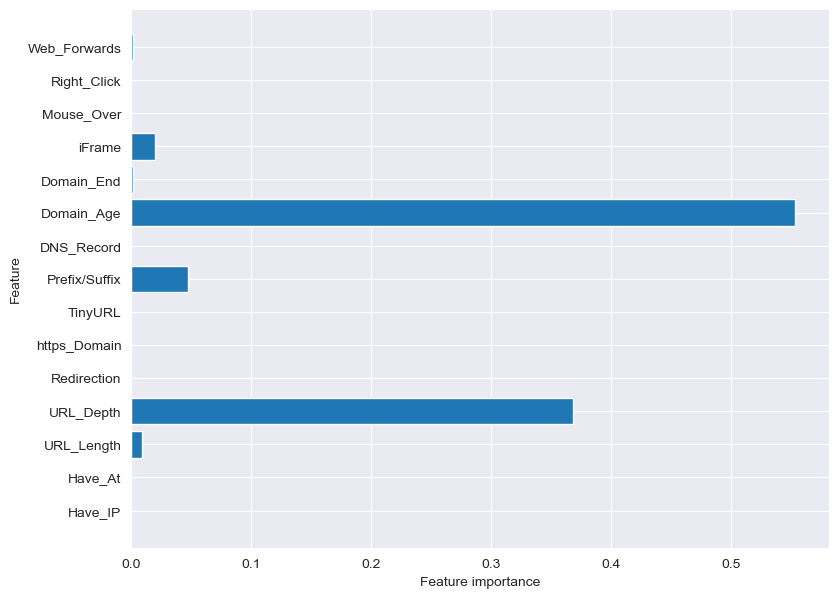

In [25]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Zapisywanie wyników:**

In [26]:
#storing the results.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **7.2. Random Forest**
Lasy losowe są obecnie jednymi z najczęściej stosowanych metod uczenia maszynowego w zadniach klasyfikacji i regresji. Las losowy składa się z wielu drzew decyzyjnych, z których każde jest nieco inne od pozostałych. Każde z tych drzew może przewidywać stosunkowo dobrze, ale prawdopodobnie będzie nadmiernie dopasowane do specyficznych części danych.

Idea lasów losowych polega na tym, że jeśli zbudujemy wiele drzew, które są dobrze dopasowane, ale na różne sposoby, możemy zmniejszyć ryzyko nadmiernego dopasowania poprzez uśrednienie ich wyników.

Aby zbudować model lasu losowego, należy określić liczbę drzew do zbudowania (parametr n_estimators w RandomForestRegressor lub RandomForestClassifier). Lasy losowe są bardzo wydajne, często działają dobrze bez intensywnego dostrajania parametrów i nie wymagają skalowania danych.

W praktyce lasy losowe mogą skutecznie poprawić wyniki modeli decyzyjnych, wykorzystując zbiorczą mądrość wielu drzew decyzyjnych. Dzięki temu są one wszechstronnym narzędziem do wielu zadań predykcyjnych w uczeniu maszynowym.

In [27]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [28]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Ocena wydajności modelu:**

In [29]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Dokładność na danych treningowych: {:.3f}".format(acc_train_forest))
print("Random forest: Dokładność na danych testowych: {:.3f}".format(acc_test_forest))

Random forest: Dokładność na danych treningowych: 0.910
Random forest: Dokładność na danych testowych: 0.914


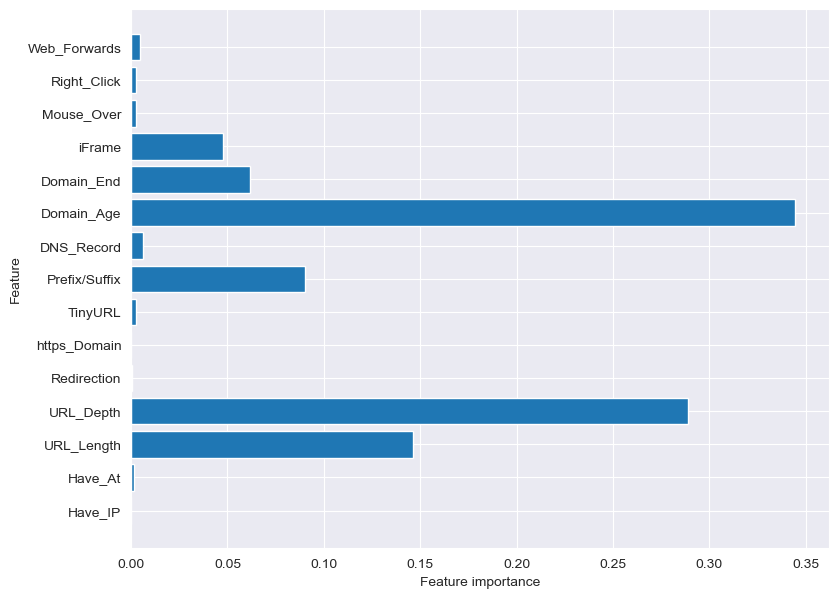

In [30]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Zapisywanie wyników:**

In [31]:
#storing the results.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **7.3. Multilayer Perceptrons (MLPs): Deep Learning**
Perceptrony wielowarstwowe (MLP) są potężnymi narzędziami stosowanymi zarówno do zadań klasyfikacji, jak i regresji. Można je uznać za uogólnienie modeli liniowych, które wykonują wiele etapów przetwarzania w celu podjęcia decyzji.

MLP składają się z wielu warstw neuronów: warstwy wejściowej, jednej lub więcej warstw ukrytych oraz warstwy wyjściowej. Każdy neuron w warstwie ukrytej i wyjściowej wykonuje obliczenia na podstawie sygnałów otrzymanych od neuronów w poprzedniej warstwie. Proces ten nazywany jest propagacją w przód.

Głębokie sieci neuronowe, czyli sieci z wieloma warstwami ukrytymi, są w stanie uchwycić skomplikowane wzorce w danych dzięki swojej złożonej strukturze. Dzięki temu MLP są bardzo wszechstronne i mogą być stosowane do szerokiej gamy zadań, takich jak rozpoznawanie obrazów, przetwarzanie języka naturalnego, czy przewidywanie szeregów czasowych.

W praktyce, aby nauczyć perceptron wielowarstwowy, używa się technik optymalizacji, takich jak propagacja wsteczna i algorytmy gradientowe. Te techniki pozwalają na dostosowanie wag w sieci w celu minimalizacji błędu predykcji. Dzięki temu MLP mogą skutecznie uczyć się z danych i dokonywać dokładnych predykcji.

MLP są podstawowym elementem wielu nowoczesnych aplikacji głębokiego uczenia.

In [32]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [33]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Ocena wydajności modelu:**

In [34]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Dokładność na danych treningowych: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Dokładność na danych testowych: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Dokładność na danych treningowych: 0.926
Multilayer Perceptrons: Dokładność na danych testowych: 0.927


**Zapisywanie wyników:**

In [35]:
#storing the results.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### **7.4. XGBoost Classifier**
XGBoost, czyli eXtreme Gradient Boosting, to jeden z najpopularniejszych algorytmów uczenia maszynowego. Jest szeroko stosowany zarówno do zadań regresji, jak i klasyfikacji. XGBoost to zaawansowana implementacja drzew decyzyjnych wzmacnianych gradientowo, zaprojektowana z myślą o szybkości i wydajności.

Algorytm XGBoost działa na zasadzie tworzenia szeregu drzew decyzyjnych, gdzie każde kolejne drzewo stara się poprawić błędy popełnione przez poprzednie. Proces ten jest znany jako wzmacnianie gradientowe. W przeciwieństwie do prostych drzew decyzyjnych, XGBoost tworzy zestaw drzew, które łącznie dają znacznie lepsze wyniki predykcji.

XGBoost jest często wybierany w konkursach uczenia maszynowego i praktycznych zastosowaniach ze względu na swoje wyjątkowe właściwości. Jest wszechstronny, skalowalny i skuteczny, co czyni go jednym z najważniejszych narzędzi w dziedzinie uczenia maszynowego.

In [36]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Ocena wydajności modelu:**

In [38]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Dokładność na danych treningowych: {:.3f}".format(acc_train_xgb))
print("XGBoost : Dokładność na danych testowych: {:.3f}".format(acc_test_xgb))

XGBoost: Dokładność na danych treningowych: 0.932
XGBoost : Dokładność na danych testowych: 0.936


**Zapisywanie wyników:**

In [39]:
#storing the results.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

## **8. Porównanie modeli**
Aby porównać wydajność modeli, tworzona jest ramka danych. Kolumny tej ramki danych to listy utworzone w celu przechowywania wyników modeli.

In [40]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.903,0.910
1,Random Forest,0.910,0.914
2,Multilayer Perceptrons,0.926,0.927
3,XGBoost,0.932,0.936


In [41]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
3,XGBoost,0.932,0.936
2,Multilayer Perceptrons,0.926,0.927
1,Random Forest,0.910,0.914
0,Decision Tree,0.903,0.910


Z powyższego porównania wynika, że klasyfikator XGBoost działa najlepiej z tym zestawem danych, osiągając dokładność na poziomie 93,6%.

Zapisujemy więc wytrenowany model do pliku.

In [43]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("models/XGBoostClassifier.pickle.dat", "wb"))

### 9. Wniosek

Cel tego notebooka został osiągnięty. Zostały przeszkolone i ocenione cztery różne modele uczenia maszynowego na zbiorze danych dotyczącym witryn internetowych. Zestawienie wyników pokazuje, że klasyfikator XGBoost osiągnął najlepsze wyniki w porównaniu z innymi modelami.

## **10. Źródła**
```
https://blog.keras.io/building-autoencoders-in-keras.html
https://en.wikipedia.org/wiki/Autoencoder
https://github.com/shreyagopal/t81_558_deep_learning/blob/master/t81_558_class_14_03_anomaly.ipynb
https://machinelearningmastery.com/save-gradient-boosting-models-xgboost-python/
```